# Метод главных компонент (Principal Component Analysis) - Проверочные задания

-----
-----

## Цель: выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

**Представьте, что Вы работаете с задачей распознавания изображений для почтовой компании. Было бы очень полезно читать цифры автоматически, даже если они написаны вручную (сейчас именно так и происходит в почтовых компаниях, причём распознавание цифр работает даже лучше, чем это может делать человек). Руководитель почтовой компании хотел бы выяснить, какие цифры распознаются наиболее сложно, чтобы можно было получить для этих цифр побольше размеченных данных. Вы будете работать с очень известным набором данных, который содержит написанные от руки цифры. С помощью метода главных компонент Вы выясните, какие цифры легче отличимы от других цифр.**

-----
-----

# Данные


Источник данных: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


## Выполните задания, написанные жирным шрифтом

**Задание: запустите ячейки для импорта библиотек и загрузки данных из файла в датафрейм.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/data.csv")
df = df[:6000]

In [3]:
df

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2,0.0,...,0,0,0,1,0,1,0,0,0,1
1,56,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2,1.0,...,0,0,0,1,0,0,1,1,0,0
2,54,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2.0,0,2.0,...,1,0,0,0,0,1,0,1,0,0
3,62,28.0,4.9,17.431477,78.400350,17.451477,78.420350,0.0,1,1.0,...,0,0,1,0,0,0,1,0,0,1
4,60,37.0,4.6,23.359407,85.325055,23.429407,85.395055,0.0,0,1.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,55,36.0,4.9,19.003517,72.827650,19.133517,72.957650,0.0,1,1.0,...,0,0,0,1,0,0,1,1,0,0
5996,9,30.0,4.6,26.474133,80.348100,26.564133,80.438100,3.0,0,3.0,...,0,0,0,1,0,1,0,0,1,0
5997,14,29.0,4.7,26.471617,80.313564,26.561617,80.403564,0.0,0,1.0,...,1,0,0,0,0,1,0,1,0,0
5998,47,22.0,4.9,13.066762,80.251865,13.096762,80.281865,3.0,0,1.0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
def get_one_hot(column_name: str, dframe: pd.DataFrame):
    one_hot = pd.get_dummies(dframe[column_name], prefix=column_name)
    dframe = dframe.drop(column_name,axis = 1)
    dframe = dframe.join(one_hot)
    return dframe

## Масштабирование данных

**Задание: с помощью Scikit-Learn выполните масштабирование датафрейма с пикселями.**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(df)

In [8]:
scaled_X

array([[ 0.85442957,  1.26927095,  0.85995422, ..., -1.86215193,
        -0.06337243,  1.88385262],
       [ 0.48002187,  0.74635142, -0.42021581, ...,  0.53701311,
        -0.06337243, -0.53082709],
       [ 0.3552193 ,  1.26927095, -0.74025832, ...,  0.53701311,
        -0.06337243, -0.53082709],
       ...,
       [-2.14083201, -0.12518112,  0.2198692 , ...,  0.53701311,
        -0.06337243, -0.53082709],
       [-0.08158968, -1.34532669,  0.85995422, ...,  0.53701311,
        -0.06337243, -0.53082709],
       [-0.20639224,  0.3977384 , -0.10017331, ..., -1.86215193,
        -0.06337243,  1.88385262]])

## Метод главных компонент (PCA - Principal Component Analysis)

**Задание: примените метод главных компонент к промасштабированному набору пикселей, выделяя 2 главные компоненты.**

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
principal_components = pca.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

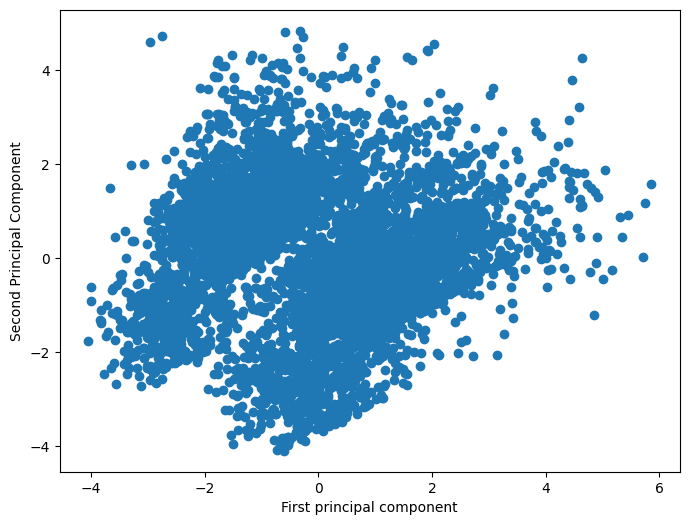

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**Задание: выясните, сколько вариативности объясняется этими 2 главными компонентами.**

In [13]:
np.sum(pca.explained_variance_ratio_)

0.15894384688644653

<AxesSubplot: >

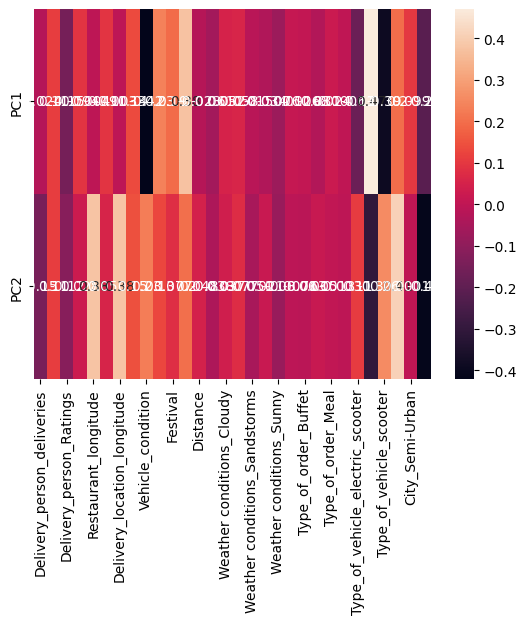

In [14]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=df.columns)
sns.heatmap(df_comp,annot=True)

In [15]:
pc = df_comp.T
pc["PC1"].sort_values(key=lambda x: abs(x), ascending=False)

Type_of_vehicle_motorcycle          0.470502
Vehicle_condition                  -0.420662
Type_of_vehicle_scooter            -0.391374
Time_taken (min)                    0.375857
multiple_deliveries                 0.234276
City_Urban                         -0.211866
City_Metropolitian                  0.195538
Festival                            0.194583
Type_of_vehicle_electric_scooter   -0.174202
Delivery_person_Ratings            -0.154513
Road_traffic_density                0.136013
Delivery_person_Age                 0.109528
City_Semi-Urban                     0.098831
Restaurant_latitude                 0.094424
Delivery_location_latitude          0.091327
Weather conditions_Sunny           -0.075717
Time_to_pick                       -0.060523
Weather conditions_Fog              0.057899
Weather conditions_Cloudy           0.051557
Weather conditions_Stormy          -0.033657
Type_of_order_Drinks               -0.030679
Type_of_order_Meal                  0.024233
Delivery_p

In [16]:
pc = df_comp.T
pc["PC2"].sort_values(key=lambda x: abs(x), ascending=False)

City_Urban                         -0.411638
City_Metropolitian                  0.408975
Delivery_location_longitude         0.377958
Restaurant_longitude                0.377140
Type_of_vehicle_motorcycle         -0.304055
Type_of_vehicle_scooter             0.255738
Vehicle_condition                   0.230138
Time_taken (min)                    0.201760
Delivery_person_deliveries         -0.147615
Road_traffic_density                0.145676
multiple_deliveries                 0.126175
Delivery_person_Ratings            -0.115972
Delivery_person_Age                 0.110599
Type_of_vehicle_electric_scooter    0.107702
Weather conditions_Sunny           -0.080065
Festival                            0.077168
Weather conditions_Fog              0.076704
Delivery_location_latitude          0.053311
Weather conditions_Sandstorms      -0.050854
Distance                            0.048195
Time_to_pick                       -0.037999
Weather conditions_Cloudy           0.036601
Restaurant

In [17]:
temp = df.describe()["Delivery_person_deliveries"]
temp

count    6000.000000
mean       48.307500
std        16.026647
min         5.000000
25%        43.000000
50%        55.000000
75%        59.000000
max        67.000000
Name: Delivery_person_deliveries, dtype: float64

In [18]:
df_temp = pd.cut(
    df["Delivery_person_deliveries"],
    bins=[temp["min"], temp["25%"], temp["50%"], temp["75%"], temp["max"] + 1],
    include_lowest=True,
)
df_temp.value_counts()

(55.0, 59.0]     1746
(4.999, 43.0]    1515
(43.0, 55.0]     1501
(59.0, 68.0]     1238
Name: Delivery_person_deliveries, dtype: int64

In [19]:
df[df["Delivery_person_deliveries"] < 15].count()

Delivery_person_deliveries          728
Delivery_person_Age                 728
Delivery_person_Ratings             728
Restaurant_latitude                 728
Restaurant_longitude                728
Delivery_location_latitude          728
Delivery_location_longitude         728
Road_traffic_density                728
Vehicle_condition                   728
multiple_deliveries                 728
Festival                            728
Time_taken (min)                    728
Distance                            728
Time_to_pick                        728
Weather conditions_Cloudy           728
Weather conditions_Fog              728
Weather conditions_Sandstorms       728
Weather conditions_Stormy           728
Weather conditions_Sunny            728
Weather conditions_Windy            728
Type_of_order_Buffet                728
Type_of_order_Drinks                728
Type_of_order_Meal                  728
Type_of_order_Snack                 728
Type_of_vehicle_electric_scooter    728


In [20]:
df_temp = pd.cut(
    df["Delivery_person_deliveries"],
    bins=[temp["min"], 15, temp["max"] + 1],
    include_lowest=True,
)
df_temp.value_counts()

(15.0, 68.0]     5170
(4.999, 15.0]     830
Name: Delivery_person_deliveries, dtype: int64

In [21]:
df["Person_Scale"] = df_temp
df

,Delivery_person_deliveries,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,...,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban,Person_Scale
0,62,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2,0.0,...,0,0,1,0,1,0,0,0,1,"(15.0, 68.0]"
1,56,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2,1.0,...,0,0,1,0,0,1,1,0,0,"(15.0, 68.0]"
2,54,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2.0,0,2.0,...,0,0,0,0,1,0,1,0,0,"(15.0, 68.0]"
3,62,28.0,4.9,17.431477,78.400350,17.451477,78.420350,0.0,1,1.0,...,0,1,0,0,0,1,0,0,1,"(15.0, 68.0]"
4,60,37.0,4.6,23.359407,85.325055,23.429407,85.395055,0.0,0,1.0,...,0,1,0,0,1,0,1,0,0,"(15.0, 68.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,55,36.0,4.9,19.003517,72.827650,19.133517,72.957650,0.0,1,1.0,...,0,0,1,0,0,1,1,0,0,"(15.0, 68.0]"
5996,9,30.0,4.6,26.474133,80.348100,26.564133,80.438100,3.0,0,3.0,...,0,0,1,0,1,0,0,1,0,"(4.999, 15.0]"
5997,14,29.0,4.7,26.471617,80.313564,26.561617,80.403564,0.0,0,1.0,...,0,0,0,0,1,0,1,0,0,"(4.999, 15.0]"
5998,47,22.0,4.9,13.066762,80.251865,13.096762,80.281865,3.0,0,1.0,...,0,0,0,0,1,0,1,0,0,"(15.0, 68.0]"


In [22]:
temp = df.describe()["Time_taken (min)"]
temp

count    6000.000000
mean       17.238000
std         9.737239
min         1.000000
25%        10.000000
50%        16.000000
75%        23.000000
max        49.000000
Name: Time_taken (min), dtype: float64

In [23]:
df_temp = pd.cut(
    df["Time_taken (min)"],
    bins=[temp["min"], temp["25%"], temp["50%"], temp["75%"], temp["max"] + 1],
    include_lowest=True,
)
df_temp

# Сделать рейтинг курьеров по скорости доставки относительно времени и растояния для каждого курьера

0       (0.999, 10.0]
1        (23.0, 50.0]
2        (23.0, 50.0]
3       (0.999, 10.0]
4        (10.0, 16.0]
            ...      
5995     (10.0, 16.0]
5996     (23.0, 50.0]
5997     (10.0, 16.0]
5998     (23.0, 50.0]
5999     (10.0, 16.0]
Name: Time_taken (min), Length: 6000, dtype: category
Categories (4, interval[float64, right]): [(0.999, 10.0] < (10.0, 16.0] < (16.0, 23.0] < (23.0, 50.0]]

In [24]:
df["Time_Scale"] = df_temp
df[df["Time_Scale"].isna()]["Time_taken (min)"]

Series([], Name: Time_taken (min), dtype: float64)

**Задание: постройте график scatterplot для цифр в 2-мерном пространстве главных компонент, раскрашивая график разными цветами на основе колонки Роль в исходном датафрейме.**

In [25]:
pca_column_name = "Person_Scale"

In [26]:
df[pca_column_name]

0        (15.0, 68.0]
1        (15.0, 68.0]
2        (15.0, 68.0]
3        (15.0, 68.0]
4        (15.0, 68.0]
            ...      
5995     (15.0, 68.0]
5996    (4.999, 15.0]
5997    (4.999, 15.0]
5998     (15.0, 68.0]
5999     (15.0, 68.0]
Name: Person_Scale, Length: 6000, dtype: category
Categories (2, interval[float64, right]): [(4.999, 15.0] < (15.0, 68.0]]

In [27]:
df[pca_column_name].factorize()[0]

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

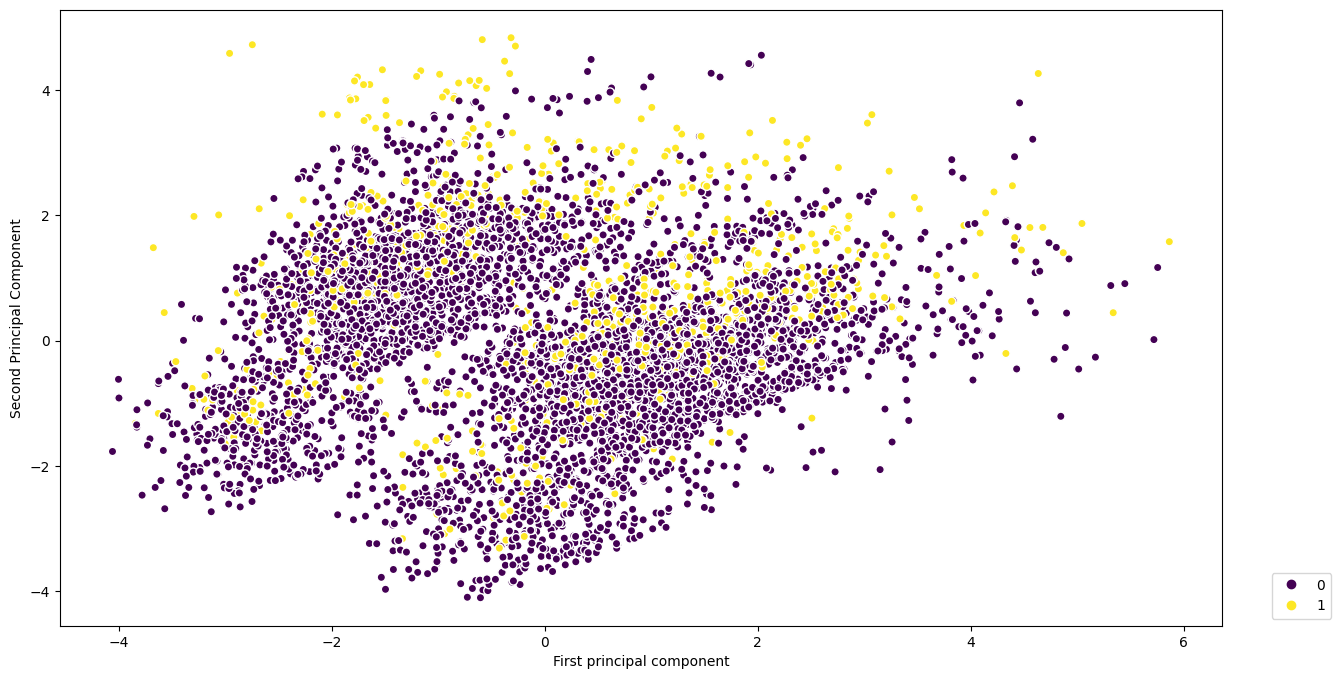

In [28]:
plt.figure(figsize=(15, 8))
scatter = plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    c=list(df[pca_column_name].factorize()[0]),
    edgecolors="white",
    
    
)
plt.xlabel("First principal component")
plt.ylabel("Second Principal Component")
plt.legend(*scatter.legend_elements(), loc="lower right", bbox_to_anchor=(1.1, 0))
plt.show()

-----------
---------

## Бонусное задание 

**Задание: постройте "интерактивный" 3D-график с результатыми работы метода главных компонент для 3 главных компонент. Это можно сделать разными способами с помощью различных библиотек, например plotly или bokeh, но на самом деле это можно сделать с помощью только Matplotlib и Jupyter Notebook. При необходимости поищите решение в гугле или другом поисковике или на StackOverflow.**

In [29]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_X)

In [30]:
df_pca = pd.DataFrame(
    principal_components,
    columns=[
        "First principal component",
        "Second principal component",
        "Third principal component",
    ],
)
df_pca

,First principal component,Second principal component,Third principal component
0,-1.371631,-2.462163,1.211886
1,-0.841092,2.140475,-1.827618
2,2.915694,0.696942,-0.919427
3,-2.751175,-1.370432,1.197008
4,1.462066,1.480512,3.055066
...,...,...,...
5995,-1.375391,0.019104,-1.623008
5996,5.894183,1.513560,1.107433
5997,1.787638,0.862519,2.379072
5998,1.930115,0.635094,0.485247


In [31]:
df_pca[pca_column_name] = list(df[pca_column_name].factorize()[0])
df_pca

,First principal component,Second principal component,Third principal component,Person_Scale
0,-1.371631,-2.462163,1.211886,0
1,-0.841092,2.140475,-1.827618,0
2,2.915694,0.696942,-0.919427,0
3,-2.751175,-1.370432,1.197008,0
4,1.462066,1.480512,3.055066,0
...,...,...,...,...
5995,-1.375391,0.019104,-1.623008,0
5996,5.894183,1.513560,1.107433,1
5997,1.787638,0.862519,2.379072,1
5998,1.930115,0.635094,0.485247,0


In [32]:
import plotly.express as px

fig = px.scatter_3d(
    df_pca,
    x="First principal component",
    y="Second principal component",
    z="Third principal component",
    color=pca_column_name,
)
fig.update_traces(marker=dict(size=10,  
                              line=dict(width=3, 
                                        color='black'))) 
fig.show()

In [33]:
# %matplotlib ipympl
# plt.figure(figsize=(15, 8))
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# scatter = ax.scatter(
#     principal_components[:, 0],
#     principal_components[:, 1],
#     principal_components[:, 2],
#     c=df["Роль"],
#     edgecolors="black",
    
# )
# ax.set_xlabel('First principal componen')
# ax.set_ylabel('Second principal componen')
# ax.set_zlabel('Third principal componen')
# plt.legend(*scatter.legend_elements(), loc="lower right", bbox_to_anchor=(1.1, 0))
# plt.show()